In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define input parameters

# Budget and asset prices
budget = 10000
price1 = 50
price2 = 100

# Expected returns
mu1 = 0.12
mu2 = 0.08

# Standard deviations
sigma1 = 0.20
sigma2 = 0.15

# Covariance
sigma12 = 0.018

# Risk-free rate
r = 0.03

# Correlation check
ro = round(sigma12 / (sigma1 * sigma2), 2)
assert -1 < ro < 1, f"Invalid correlation: ρ = {ro}"


In [5]:
# Calculate MVP (Minimum Variance Portfolio)

w_mvp = (sigma2**2 - sigma12) / (sigma1**2 + sigma2**2 - 2 * sigma12)
mi_mvp = w_mvp * mu1 + (1 - w_mvp) * mu2
var_mvp = (
    w_mvp**2 * sigma1**2
    + (1 - w_mvp)**2 * sigma2**2
    + 2 * w_mvp * (1 - w_mvp) * sigma12
)
sigma_mvp = np.sqrt(var_mvp)

assert mi_mvp >= r, f"MVP return ({mi_mvp}) is below risk-free rate ({r})"


In [7]:
# Calculate MP (Market Portfolio)

c = sigma2**2 * (mu1 - r) - sigma12 * (mu2 - r)
d = sigma1**2 * (mu2 - r) - sigma12 * (mu1 - r)
w_mp = c / (c + d)

mi_mp = w_mp * mu1 + (1 - w_mp) * mu2
var_mp = (
    w_mp**2 * sigma1**2
    + (1 - w_mp)**2 * sigma2**2
    + 2 * w_mp * (1 - w_mp) * sigma12
)
sigma_mp = np.sqrt(var_mp)

# Units to buy/short
s1_mp = (w_mp * budget) / price1
s2_mp = ((1 - w_mp) * budget) / price2


In [9]:
# Print results

print("### Minimum Variance Portfolio (MVP)")
print(f"Expected return: {round(mi_mvp, 4)}")
print(f"Risk (std dev): {round(sigma_mvp, 4)}")

print("\n### Market Portfolio (MP)")
print(f"Expected return: {round(mi_mp, 4)}")
print(f"Risk (std dev): {round(sigma_mp, 4)}")

print("\n### Investment Plan:")
print(f"Risky Asset 1: {'Buy' if s1_mp >= 0 else 'Short'} {abs(round(s1_mp, 2))} units")
print(f"Risky Asset 2: {'Buy' if s2_mp >= 0 else 'Short'} {abs(round(s2_mp, 2))} units")


### Minimum Variance Portfolio (MVP)
Expected return: 0.0868
Risk (std dev): 0.1474

### Market Portfolio (MP)
Expected return: 0.1099
Risk (std dev): 0.1749

### Investment Plan:
Risky Asset 1: Buy 149.5 units
Risky Asset 2: Buy 25.25 units


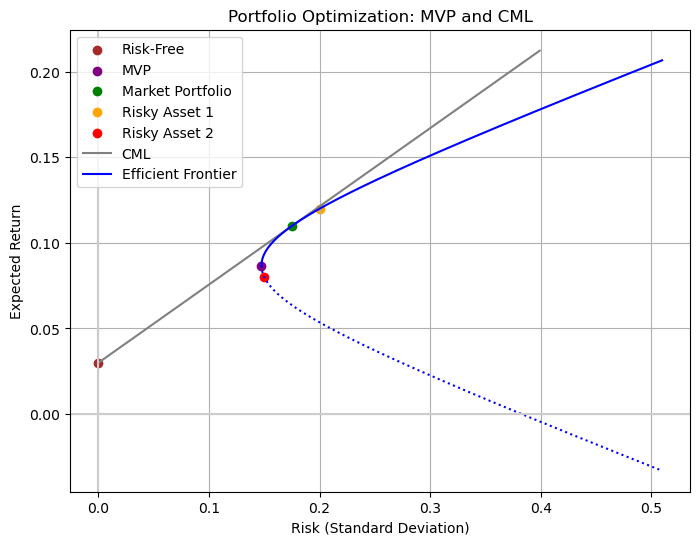

In [11]:
# Plot CML and Efficient Frontier

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Points
ax.scatter(0, r, c='brown', label='Risk-Free')
ax.scatter(sigma_mvp, mi_mvp, c='purple', label='MVP')
ax.scatter(sigma_mp, mi_mp, c='green', label='Market Portfolio')
ax.scatter(sigma1, mu1, c='orange', label='Risky Asset 1')
ax.scatter(sigma2, mu2, c='red', label='Risky Asset 2')

# CML (Capital Market Line)
x = np.arange(0, max(sigma1, sigma2, sigma_mp) + 0.2, 0.001)
y = r + x * ((mi_mp - r) / sigma_mp)
plt.plot(x, y, c='gray', label='CML')

# Efficient Frontier (Hyperbola)
u = np.arange(mi_mvp, mi_mvp + 0.12, 0.0001)
A = (mu1 - mu2) ** 2
B = (u - mu2) ** 2 * sigma1 ** 2
C = (mu1 - u) ** 2 * sigma2 ** 2
D = 2 * (u - mu2) * (mu1 - u) * sigma12
z = (1 / A) * (B + C + D)
v = np.sqrt(z)
q = u - 2 * (u - mi_mvp)

plt.plot(v, u, c='blue', label='Efficient Frontier')
plt.plot(v, q, c='blue', linestyle='dotted')

# Labels
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Portfolio Optimization: MVP and CML')
plt.axhline(0, color='#cccccc')
plt.axvline(0, color='#cccccc')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
